# Contents
1. Imports
2. Checks
3. Distribution of Orders

# 1. Imports

In [2]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [4]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))

# 2. Checks

In [5]:
#Dimensions
df.shape

(32403719, 44)

In [6]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Overview

## 3.1. Department

In [7]:
# Count the number of orders per department
orders_departmet_counts = df['department'].value_counts().sort_values(ascending=False)
orders_departmet_counts

department
produce            9479291
dairy eggs         5398185
snacks             2887550
beverages          2688115
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447010
babies              423794
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

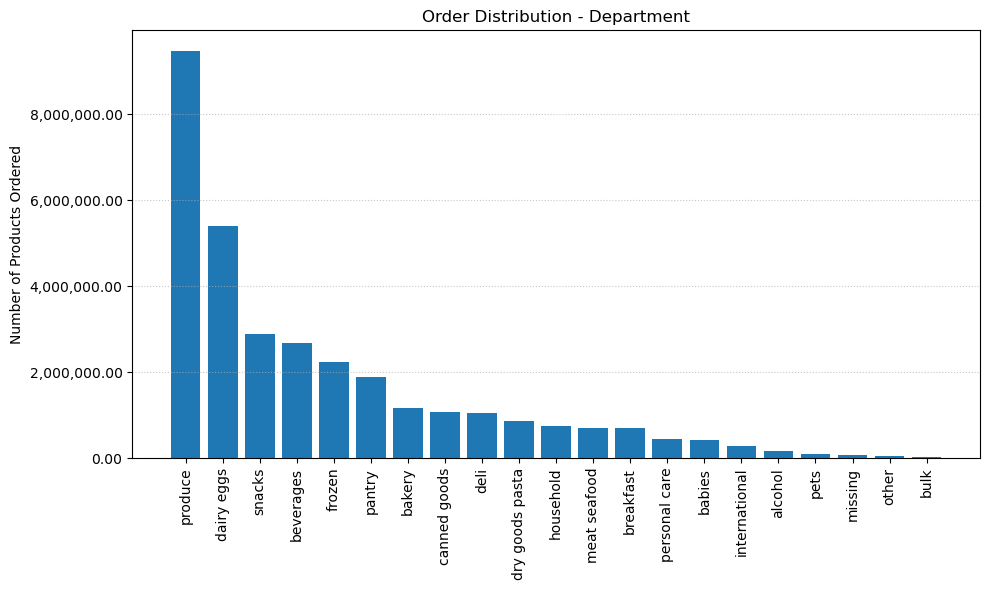

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/3.1_departments.png


In [8]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(orders_departmet_counts.index, orders_departmet_counts.values)

# Set the title and labels
plt.title('Order Distribution - Department')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Format x-axis with thousands separator
plt.xticks(rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '3.1_departments.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Product Category

In [9]:
# Count the number of orders per department
orders_category_counts = df['product_category'].value_counts().sort_values(ascending=False)
orders_category_counts

product_category
perishables            17810080
non-perishables         9669953
beverages               2688115
household                738666
personal care            447010
babies                   423794
miscellaneous            374689
alcoholic beverages      153696
pets                      97716
Name: count, dtype: int64

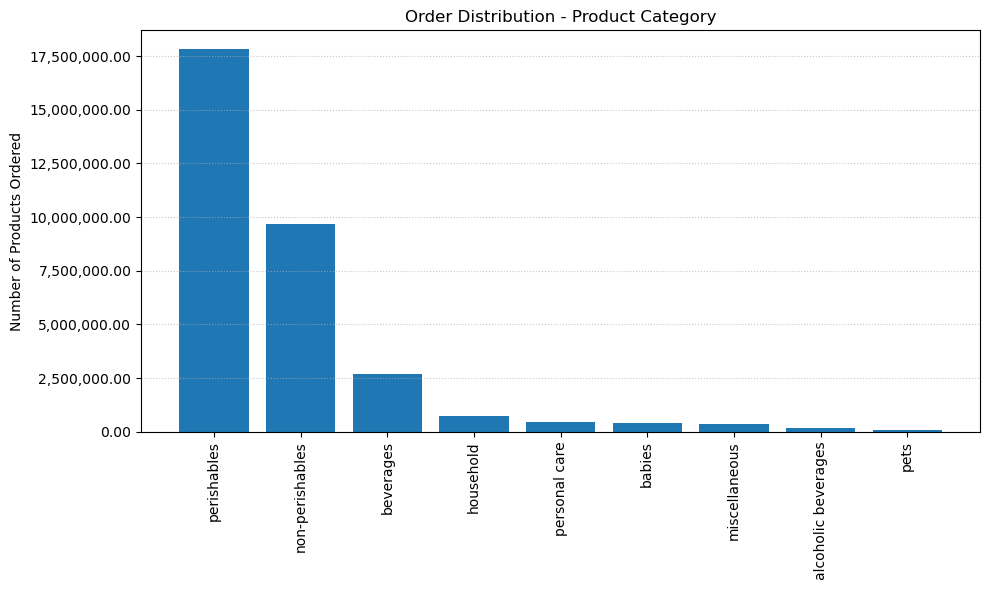

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/3.2_categories.png


In [10]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(orders_category_counts.index, orders_category_counts.values)

# Set the title and labels
plt.title('Order Distribution - Product Category')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Format x-axis with thousands separator
plt.xticks(rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '3.2_categories.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

# 4. Distribution of Orders

## 4.1. Activity Flag

### 4.1.1. Orders per Department

In [11]:
# Create a cross-tabulation
orders_department_activity = pd.crosstab(df['department'], df['activity_flag'])
orders_department_activity = orders_department_activity.loc[orders_departmet_counts.index]
orders_department_activity

activity_flag,Low Activity,Moderate Activity,High Activity
department,,,
produce,2371990,4657838,2449463
dairy eggs,1325764,2648074,1424347
snacks,731152,1425232,731166
beverages,699539,1320057,668519
frozen,656159,1114891,463693
pantry,530099,910470,434800
bakery,303944,572475,296009
canned goods,317181,528796,222081
deli,281184,521080,248985


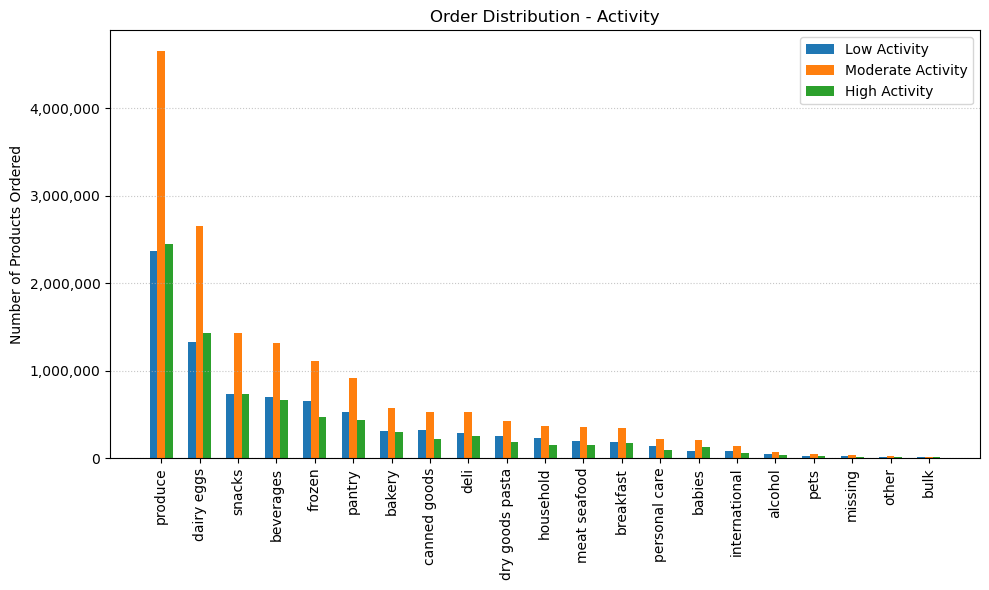

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.1.1_orders_departments_activity.png


In [12]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_activity.index))

# Plot each category as a separate bar (grouped format)
for i, department_activity in enumerate(orders_department_activity.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_activity[department_activity], 
        width=bar_width, 
        label=department_activity
    )

# Set the title and labels
plt.title('Order Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_activity.columns) - 1) / 2), orders_department_activity.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.1.1_orders_departments_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.1.2. Orders by Product Category

In [13]:
# Create a cross-tabulation
orders_category_activity = pd.crosstab(df['product_category'], df['activity_flag'])
orders_category_activity = orders_category_activity.loc[orders_category_counts.index]
orders_category_activity

activity_flag,Low Activity,Moderate Activity,High Activity
product_category,,,
perishables,4481075,8756380,4572625
non-perishables,2684072,4767800,2218081
beverages,699539,1320057,668519
household,224443,363940,150283
personal care,133073,219159,94778
babies,83984,208273,131537
miscellaneous,109919,181916,82854
alcoholic beverages,49318,73601,30777
pets,28489,49634,19593


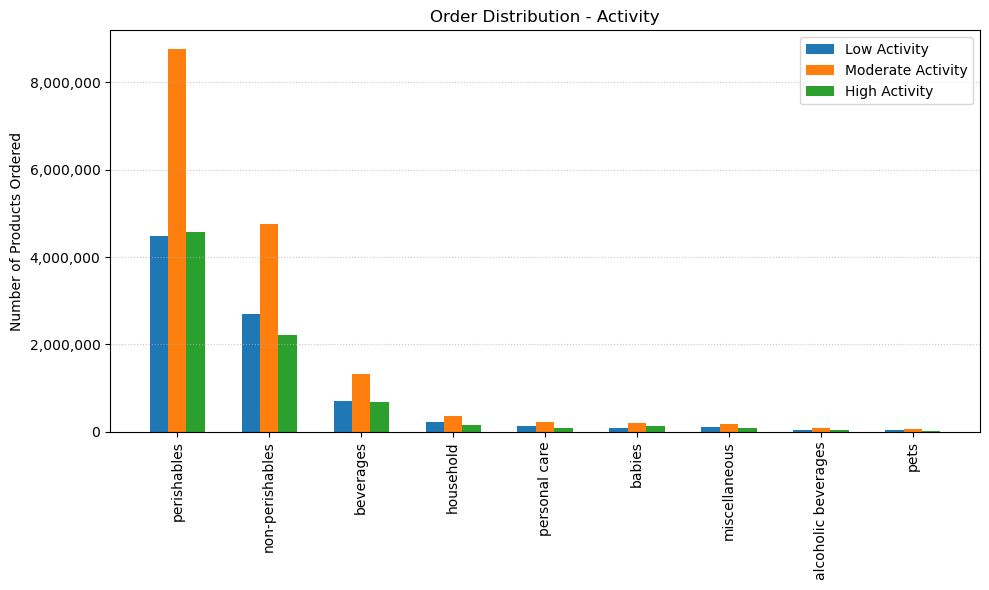

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.1.2_orders_categories_activity.png


In [14]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_activity.index))

# Plot each category as a separate bar (grouped format)
for i, category_activity in enumerate(orders_category_activity.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_activity[category_activity], 
        width=bar_width, 
        label=category_activity
    )

# Set the title and labels
plt.title('Order Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_activity.columns) - 1) / 2), orders_category_activity.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.1.2_orders_categories_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.2. Spending Flag

### 4.2.1. Orders per Department

In [15]:
# Create a cross-tabulation
orders_department_spending = pd.crosstab(df['department'], df['spending_flag'])
orders_department_spending = orders_department_spending.loc[orders_departmet_counts.index]
orders_department_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
department,,,,
produce,2071398,4842972,2452059,112862
dairy eggs,1247307,2710587,1368876,71415
snacks,1150797,1296580,426497,13676
beverages,836707,1248973,566787,35648
frozen,551446,1138154,519874,25269
pantry,428318,959908,464692,22451
bakery,273784,604636,280692,13316
canned goods,221535,567265,268743,10515
deli,263190,533897,242827,11335


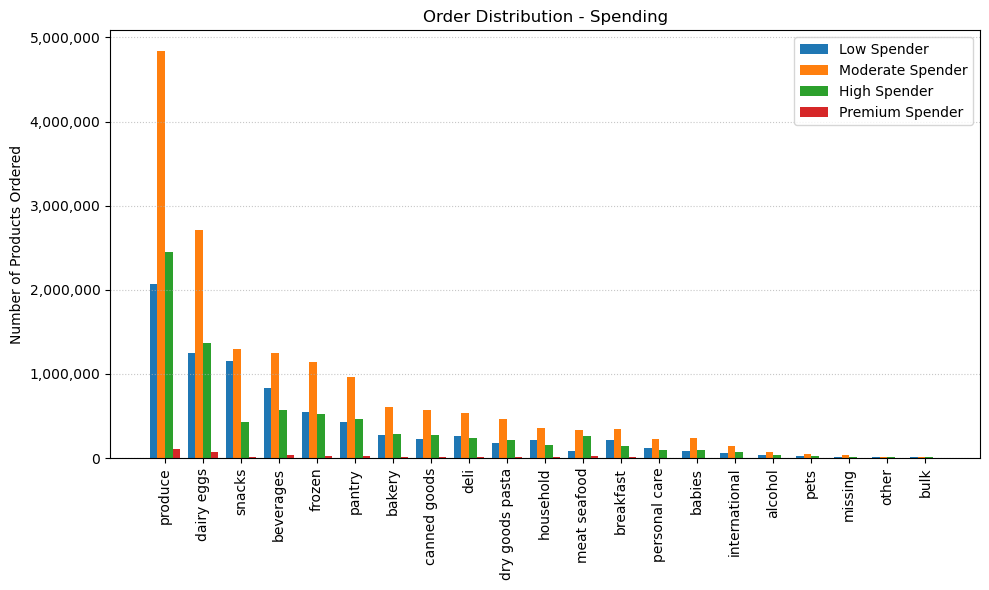

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.2.1_orders_departments_spending.png


In [16]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_spending.index))

# Plot each category as a separate bar (grouped format)
for i, department_spending in enumerate(orders_department_spending.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_spending[department_spending], 
        width=bar_width, 
        label=department_spending
    )

# Set the title and labels
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_spending.columns) - 1) / 2), orders_department_spending.index, rotation=90)


# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.2.1_orders_departments_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.2.2. Orders by Product Category

In [17]:
# Create a cross-tabulation
orders_category_spending = pd.crosstab(df['product_category'], df['spending_flag'])
orders_category_spending = orders_category_spending.loc[orders_category_counts.index]
orders_category_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
product_category,,,,
perishables,3944896,9026058,4603785,235341
non-perishables,2756891,4777493,2047851,87718
beverages,836707,1248973,566787,35648
household,210031,361097,158399,9139
personal care,121176,222927,97190,5717
babies,85792,243367,92245,2390
miscellaneous,85271,193155,92420,3843
alcoholic beverages,41874,65958,41287,4577
pets,22319,50775,23613,1009


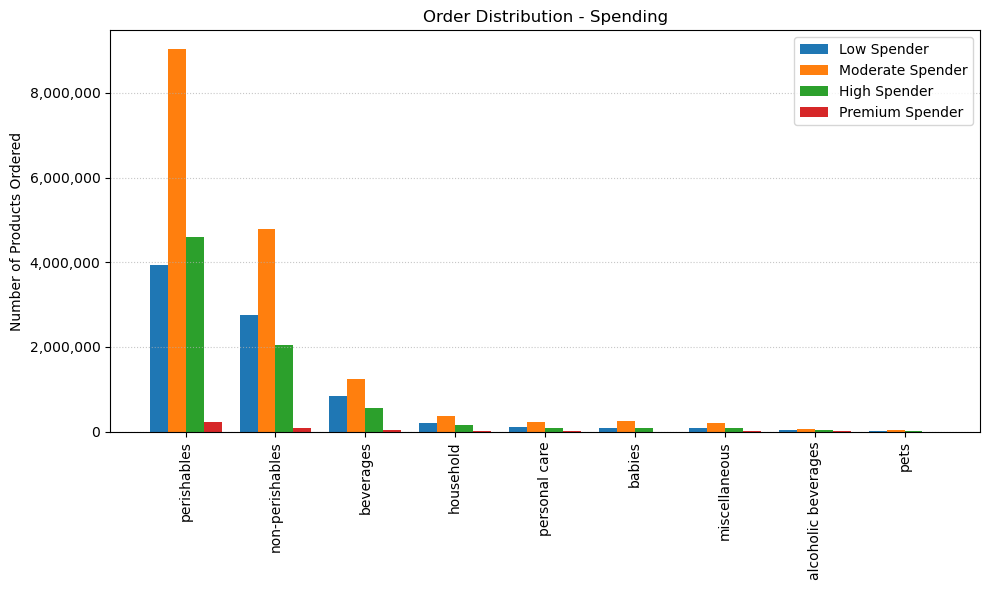

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.2.2_orders_categories_spending.png


In [18]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_spending.index))

# Plot each category as a separate bar (grouped format)
for i, category_spending in enumerate(orders_category_spending.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_spending[category_spending], 
        width=bar_width, 
        label=category_spending
    )

# Set the title and labels
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_spending.columns) - 1) / 2), orders_category_spending.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.2.2_orders_categories_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.3. Frequency Flag

### 4.3.1. Orders per Department

In [19]:
# Create a cross-tabulation
orders_department_frequency = pd.crosstab(df['department'], df['frequency_flag'])
orders_department_frequency = orders_department_frequency.loc[orders_departmet_counts.index]
orders_department_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
department,,,
produce,2120579,4293805,3064907
dairy eggs,1210578,2447039,1740568
snacks,678698,1330971,877881
beverages,643800,1185211,859104
frozen,602733,1013245,618765
pantry,471823,824202,579344
bakery,275278,524637,372513
canned goods,284521,493210,290327
deli,259961,482167,309121


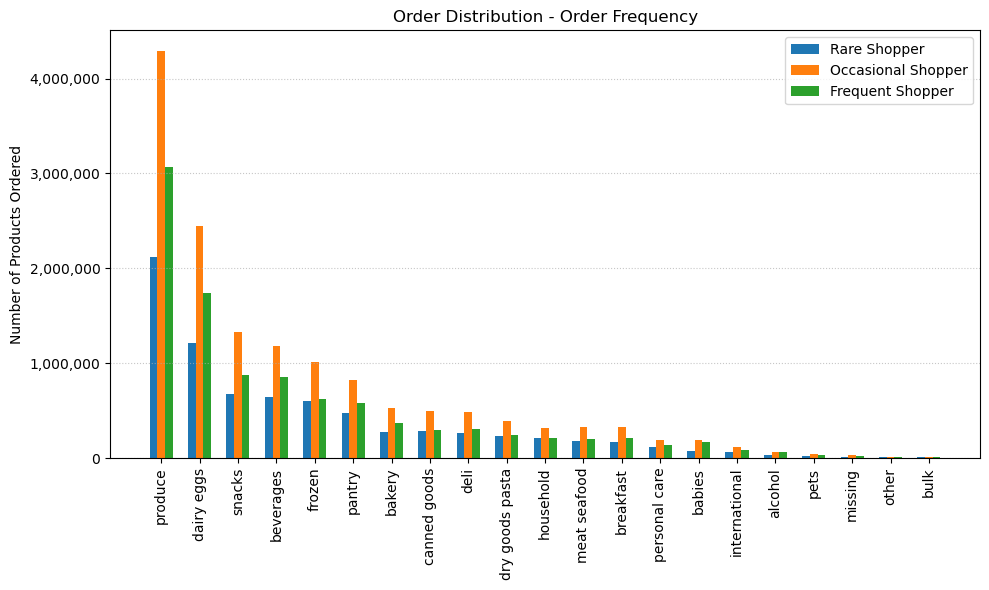

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.3.1_orders_departments_frequency.png


In [20]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, department_frequency in enumerate(orders_department_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_frequency[department_frequency], 
        width=bar_width, 
        label=department_frequency
    )

# Set the title and labels
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_frequency.columns) - 1) / 2), orders_department_frequency.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.3.1_orders_departments_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.3.2. Orders by Product Category

In [21]:
# Create a cross-tabulation
orders_category_frequency = pd.crosstab(df['product_category'], df['frequency_flag'])
orders_category_frequency = orders_category_frequency.loc[orders_category_counts.index]
orders_category_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
product_category,,,
perishables,4044858,8073690,5691532
non-perishables,2445857,4396757,2827339
beverages,643800,1185211,859104
household,212741,318528,207397
personal care,119567,192626,134817
babies,69744,186332,167718
miscellaneous,89826,167330,117533
alcoholic beverages,36578,58463,58655
pets,26555,44055,27106


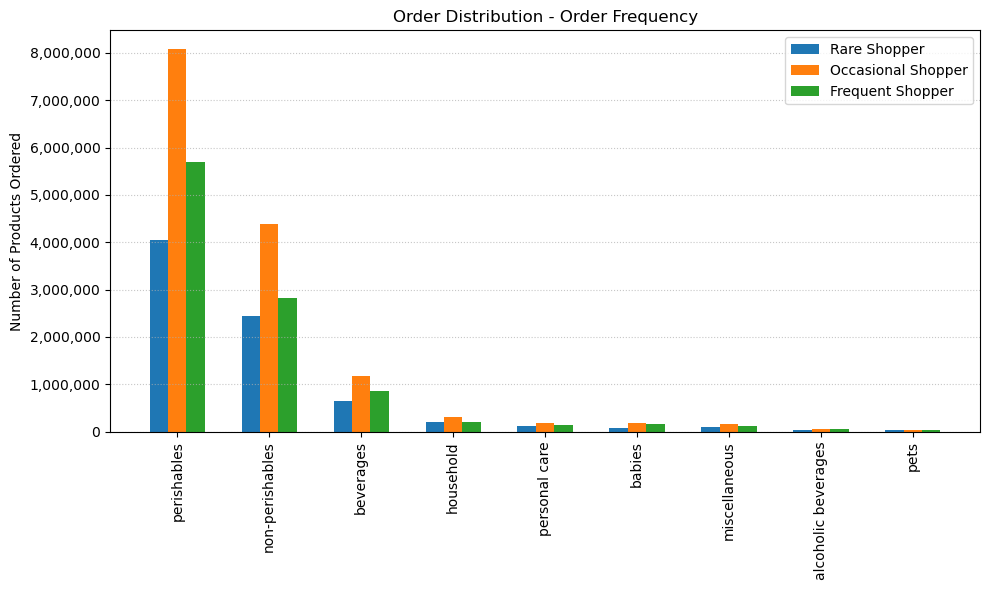

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.3.2_orders_categories_frequency.png


In [22]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, category_frequency in enumerate(orders_category_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_frequency[category_frequency], 
        width=bar_width, 
        label=category_frequency
    )

# Set the title and labels
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_frequency.columns) - 1) / 2), orders_category_frequency.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.3.2_orders_categories_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.4. Loyalty Flag

### 4.4.1. Orders per Department

In [23]:
# Create a cross-tabulation
orders_department_loyalty = pd.crosstab(df['department'], df['loyalty_flag'])
orders_department_loyalty = orders_department_loyalty.loc[orders_departmet_counts.index]
orders_department_loyalty

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
department,,,
produce,3102083,4398734,1978474
dairy eggs,1792907,2475323,1129955
snacks,1212856,1248288,426406
beverages,1013651,1202506,471958
frozen,876061,989488,369194
pantry,677862,841970,355537
bakery,406707,531177,234544
canned goods,399913,485185,182960
deli,384544,478658,188047


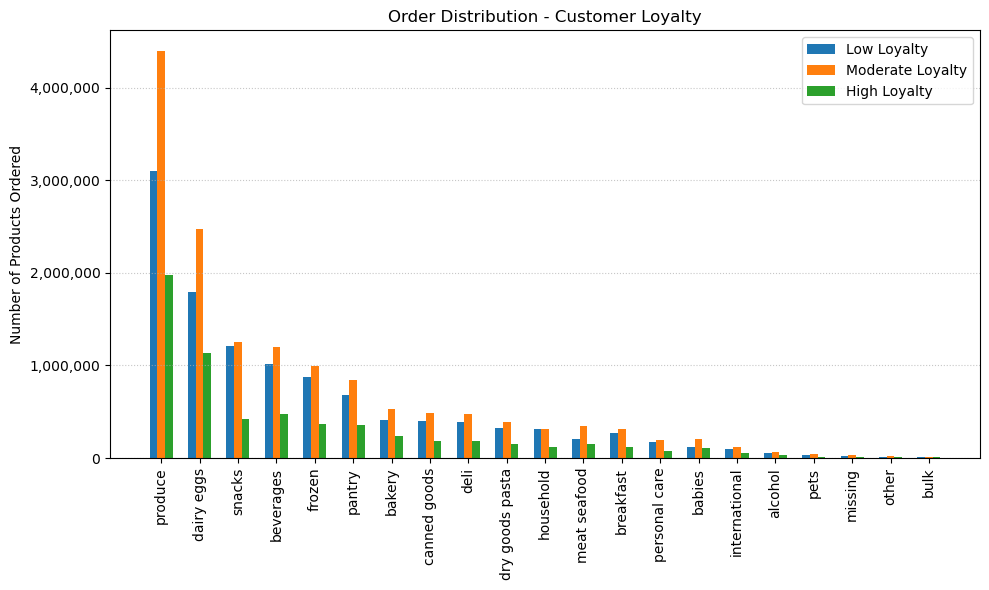

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.4.1_orders_departments_loyalty.png


In [24]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, department_loyalty in enumerate(orders_department_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_loyalty[department_loyalty], 
        width=bar_width, 
        label=department_loyalty
    )

# Set the title and labels
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_loyalty.columns) - 1) / 2), orders_department_loyalty.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.4.1_orders_departments_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.4.2. Orders by Product Category

In [25]:
# Create a cross-tabulation
orders_category_loyalty = pd.crosstab(df['product_category'], df['loyalty_flag'])
orders_category_loyalty = orders_category_loyalty.loc[orders_category_counts.index]
orders_category_loyalty

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
product_category,,,
perishables,5896727,8227727,3685626
non-perishables,3774212,4284062,1611679
beverages,1013651,1202506,471958
household,310573,313612,114481
personal care,177418,195747,73845
babies,114272,202076,107446
miscellaneous,135175,171683,67831
alcoholic beverages,55862,66708,31126
pets,38085,43804,15827


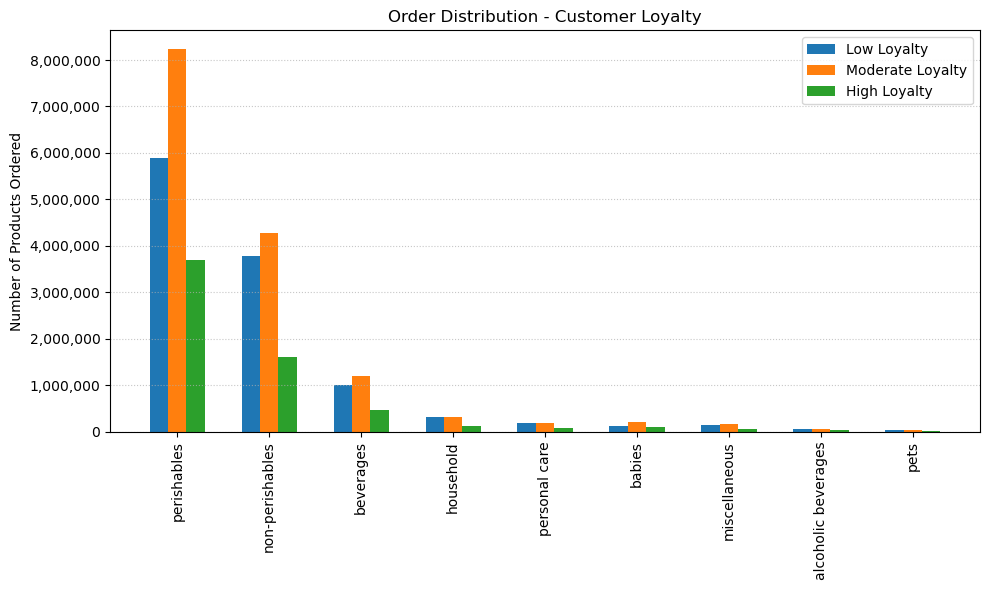

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.4.2_orders_categories_loyalty.png


In [26]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, category_loyalty in enumerate(orders_category_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_loyalty[category_loyalty], 
        width=bar_width, 
        label=category_loyalty
    )

# Set the title and labels
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_loyalty.columns) - 1) / 2), orders_category_loyalty.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.4.2_orders_categories_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.5. Region

### 4.5.1. Orders per Department

In [27]:
# Create a cross-tabulation
orders_department_region = pd.crosstab(df['department'], df['region'])
orders_department_region = orders_department_region.loc[orders_departmet_counts.index]
orders_department_region

region,West,Midwest,South,Northeast
department,,,,
produce,2424964,2227937,3160551,1665839
dairy eggs,1383399,1264070,1796783,953933
snacks,741814,673715,957346,514675
beverages,680185,625572,898940,483418
frozen,571829,524096,747900,390918
pantry,481387,442101,622436,329445
bakery,301145,273869,388815,208599
canned goods,274586,250702,356015,186755
deli,269335,245678,349419,186817


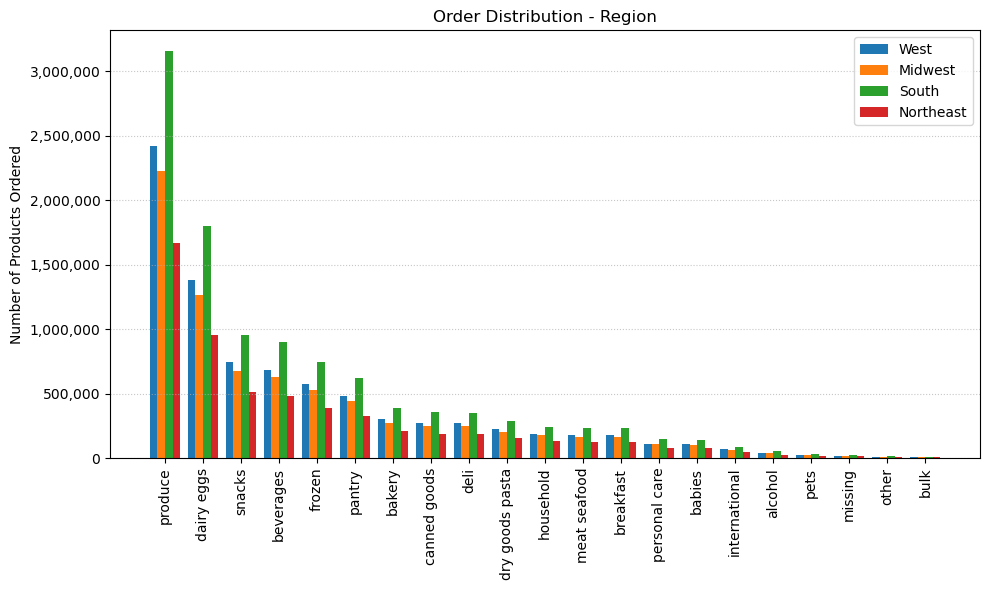

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.5.1_departments_region.png


In [28]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_region.index))

# Plot each category as a separate bar (grouped format)
for i, department_region in enumerate(orders_department_region.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_region[department_region], 
        width=bar_width, 
        label=department_region
    )

# Set the title and labels
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_region.columns) - 1) / 2), orders_department_region.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.5.1_departments_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.5.2. Orders by Product Category

In [29]:
# Create a cross-tabulation
orders_category_region = pd.crosstab(df['product_category'], df['region'])
orders_category_region = orders_category_region.loc[orders_category_counts.index]
orders_category_region

region,West,Midwest,South,Northeast
product_category,,,,
perishables,4561269,4177683,5931320,3139808
non-perishables,2483916,2266127,3216925,1702985
beverages,680185,625572,898940,483418
household,188287,175824,243070,131485
personal care,112528,105596,150164,78722
babies,106020,98981,143654,75139
miscellaneous,95601,88691,124547,65850
alcoholic beverages,39344,36186,51624,26542
pets,25491,22355,31269,18601


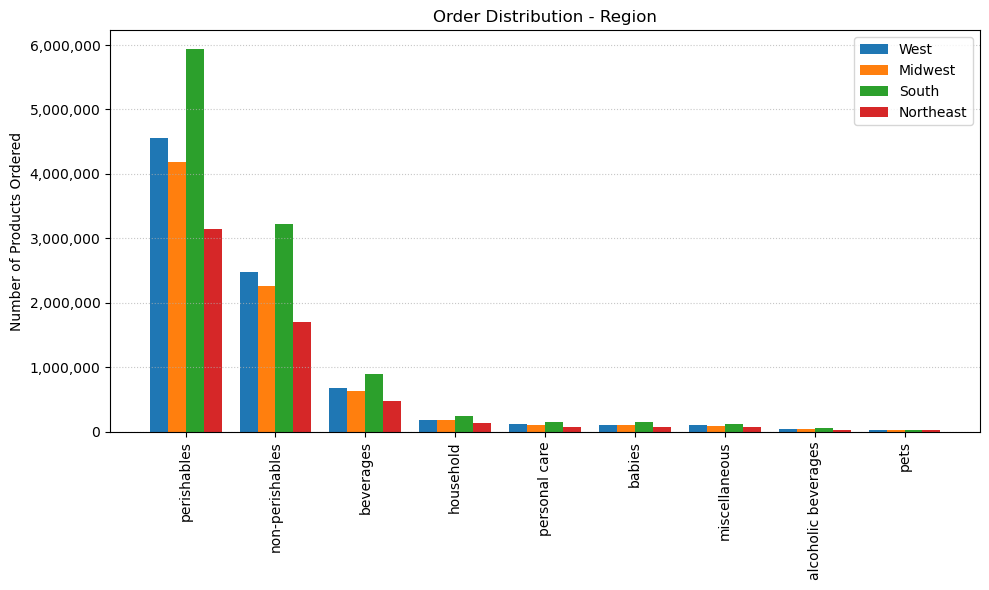

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.5.2_categories_region.png


In [30]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_region.index))

# Plot each category as a separate bar (grouped format)
for i, category_region in enumerate(orders_category_region.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_region[category_region], 
        width=bar_width, 
        label=category_region
    )

# Set the title and labels
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_region.columns) - 1) / 2), orders_category_region.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.5.2_categories_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.6. Age Profile

### 4.6.1. Orders per Department

In [31]:
# Create a cross-tabulation
orders_department_age = pd.crosstab(df['department'], df['age_profile'])
orders_department_age = orders_department_age.loc[orders_departmet_counts.index]
orders_department_age

age_profile,Young Adult,Adult,Middle Aged,Senior
department,,,,
produce,1177604,2977895,2955478,2368314
dairy eggs,674781,1700531,1677239,1345634
snacks,360944,905430,902536,718640
beverages,333087,833946,845813,675269
frozen,279975,694527,699924,560317
pantry,233795,586041,587117,468416
bakery,146426,368526,366253,291223
canned goods,133490,335560,332987,266021
deli,130500,330363,328245,262141


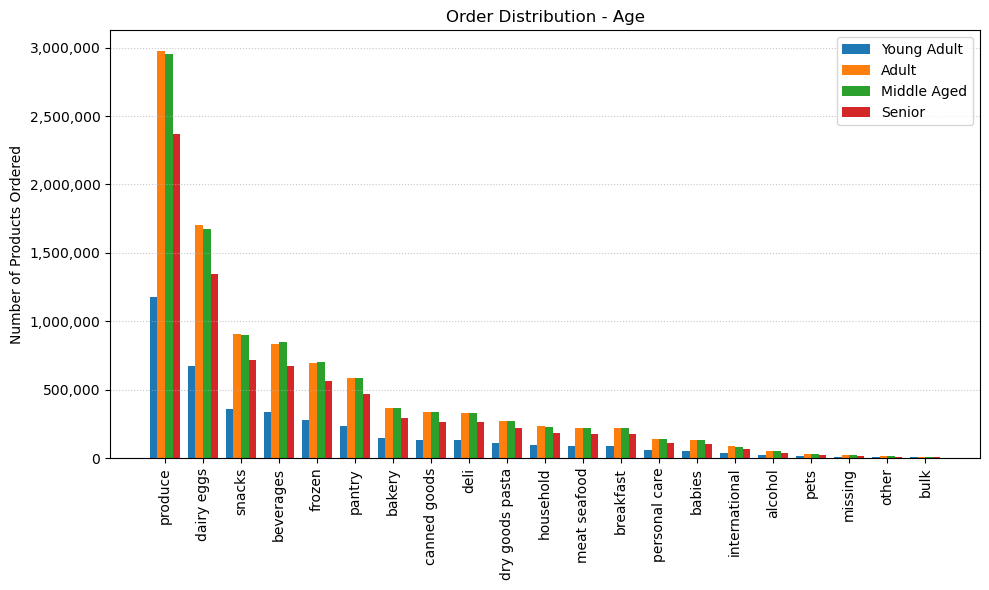

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.6.1_departments_age.png


In [32]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_age.index))

# Plot each category as a separate bar (grouped format)
for i, department_age in enumerate(orders_department_age.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_age[department_age], 
        width=bar_width, 
        label=department_age
    )

# Set the title and labels
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_age.columns) - 1) / 2), orders_department_age.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.6.1_departments_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.6.2. Orders by Product Category

In [33]:
# Create a cross-tabulation
orders_category_age = pd.crosstab(df['product_category'], df['age_profile'])
orders_category_age = orders_category_age.loc[orders_category_counts.index]
orders_category_age

age_profile,Young Adult,Adult,Middle Aged,Senior
product_category,,,,
perishables,2218164,5597888,5547458,4446570
non-perishables,1211949,3022333,3023687,2411984
beverages,333087,833946,845813,675269
household,91673,231340,229615,186038
personal care,55738,139685,141141,110446
babies,53011,134725,132832,103226
miscellaneous,47703,117705,116848,92433
alcoholic beverages,20411,48361,47976,36948
pets,13295,29807,29737,24877


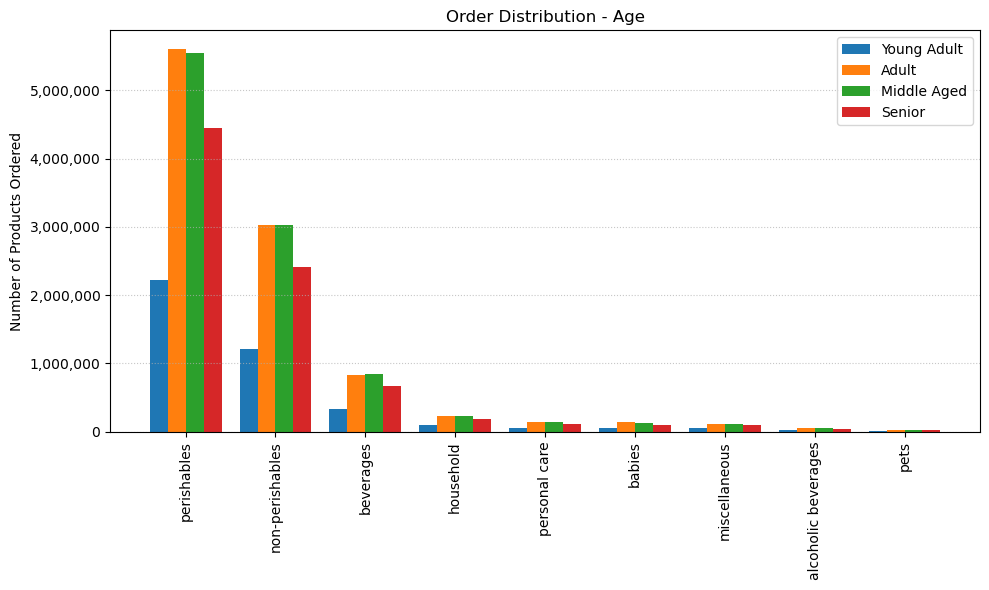

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.6.2_categories_age.png


In [34]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_age.index))

# Plot each category as a separate bar (grouped format)
for i, category_age in enumerate(orders_category_age.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_age[category_age], 
        width=bar_width, 
        label=category_age
    )

# Set the title and labels
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_age.columns) - 1) / 2), orders_category_age.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.6.2_categories_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.7. Income Profile

### 4.7.1. Orders per Department

In [35]:
# Create a cross-tabulation
orders_department_income = pd.crosstab(df['department'], df['income_profile'])
orders_department_income = orders_department_income.loc[orders_departmet_counts.index]
orders_department_income

income_profile,Low Income,Middle Income,High Income
department,,,
produce,2040258,4883490,2555543
dairy eggs,1182632,2755221,1460332
snacks,959070,1261395,667085
beverages,731099,1269435,687581
frozen,499243,1129796,605704
pantry,406275,956787,512307
bakery,255822,594096,322510
canned goods,215224,554910,297924
deli,240958,530695,279596


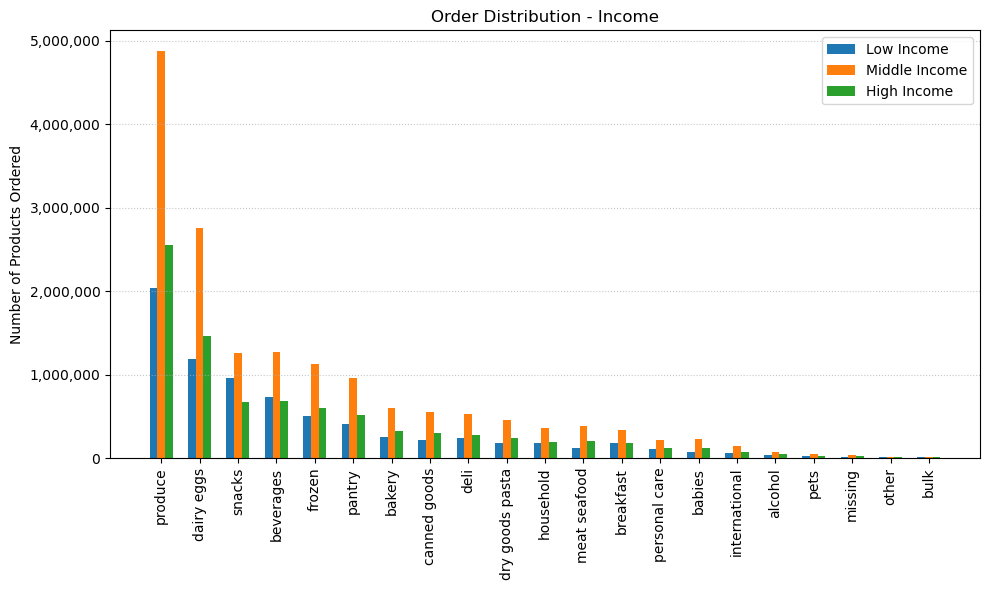

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.7.1_departments_income.png


In [36]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_income.index))

# Plot each category as a separate bar (grouped format)
for i, department_income in enumerate(orders_department_income.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_income[department_income], 
        width=bar_width, 
        label=department_income
    )

# Set the title and labels
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_income.columns) - 1) / 2), orders_department_income.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.7.1_departments_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.7.2. Orders by Product Category

In [37]:
# Create a cross-tabulation
orders_category_income = pd.crosstab(df['product_category'], df['income_profile'])
orders_category_income = orders_category_income.loc[orders_category_counts.index]
orders_category_income

income_profile,Low Income,Middle Income,High Income
product_category,,,
perishables,3839426,9147835,4822819
non-perishables,2447360,4710648,2511945
beverages,731099,1269435,687581
household,181679,359112,197875
personal care,106134,221965,118911
babies,77192,229411,117191
miscellaneous,80177,192891,101621
alcoholic beverages,37371,71227,45098
pets,20495,49621,27600


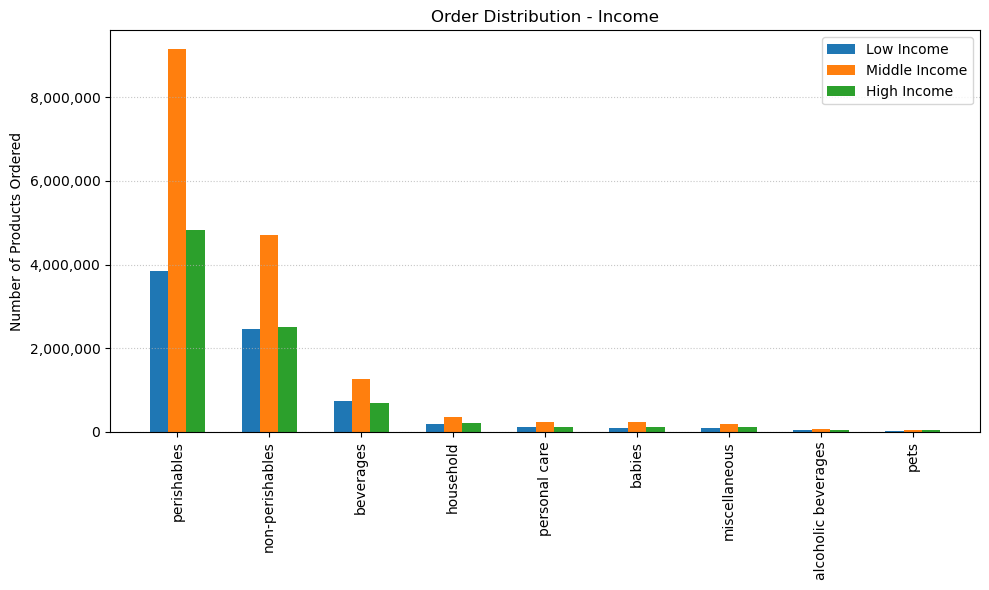

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.7.2_categories_income.png


In [38]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_income.index))

# Plot each category as a separate bar (grouped format)
for i, category_income in enumerate(orders_category_income.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_income[category_income], 
        width=bar_width, 
        label=category_income
    )

# Set the title and labels
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_income.columns) - 1) / 2), orders_category_income.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.7.2_categories_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.8. Family Status

### 4.8.1. Orders per Department

In [39]:
# Create a cross-tabulation
orders_department_family = pd.crosstab(df['department'], df['family_status'])
orders_department_family = orders_department_family.loc[orders_departmet_counts.index]
orders_department_family

family_status,Single Adult,Young Parent,Family
department,,,
produce,2375445,449628,6654218
dairy eggs,1349259,260758,3788168
snacks,720798,137163,2029589
beverages,674442,124629,1889044
frozen,557160,108533,1569050
pantry,466757,90272,1318340
bakery,294405,56142,821881
canned goods,264838,51190,752030
deli,265145,50415,735689


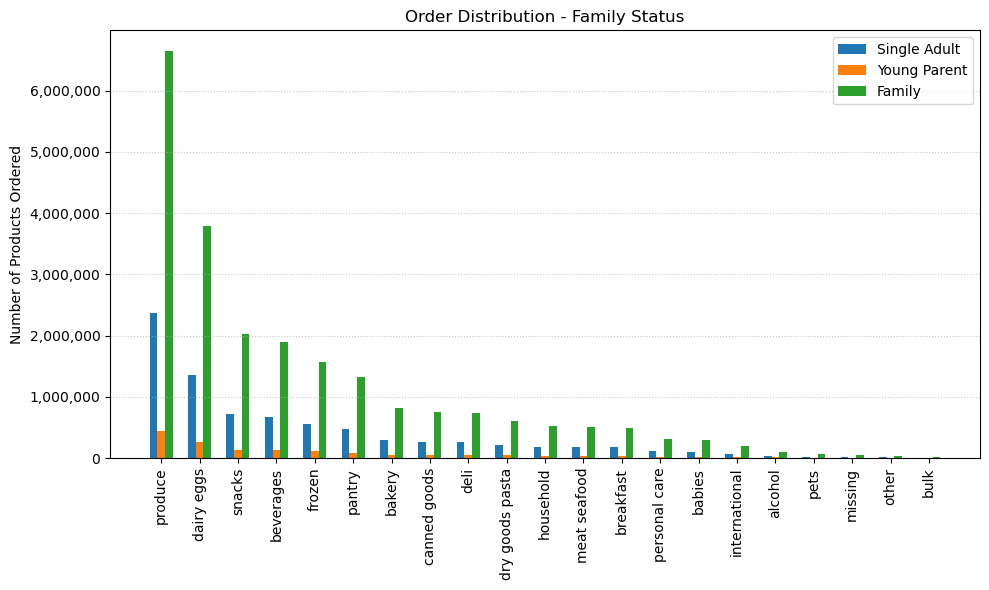

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.8.1_departments_family.png


In [40]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_department_family.index))

# Plot each category as a separate bar (grouped format)
for i, department_family in enumerate(orders_department_family.columns):
    plt.bar(
        x + i * bar_width, 
        orders_department_family[department_family], 
        width=bar_width, 
        label=department_family
    )

# Set the title and labels
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_department_family.columns) - 1) / 2), orders_department_family.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.8.1_departments_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.8.2. Orders by Product Category

In [41]:
# Create a cross-tabulation
orders_category_family = pd.crosstab(df['product_category'], df['family_status'])
orders_category_family = orders_category_family.loc[orders_category_counts.index]
orders_category_family

family_status,Single Adult,Young Parent,Family
product_category,,,
perishables,4458338,850924,12500818
non-perishables,2407670,465265,6797018
beverages,674442,124629,1889044
household,180773,35226,522667
personal care,111903,21283,313824
babies,106494,20146,297154
miscellaneous,93976,18556,262157
alcoholic beverages,39118,8896,105682
pets,24583,5620,67513


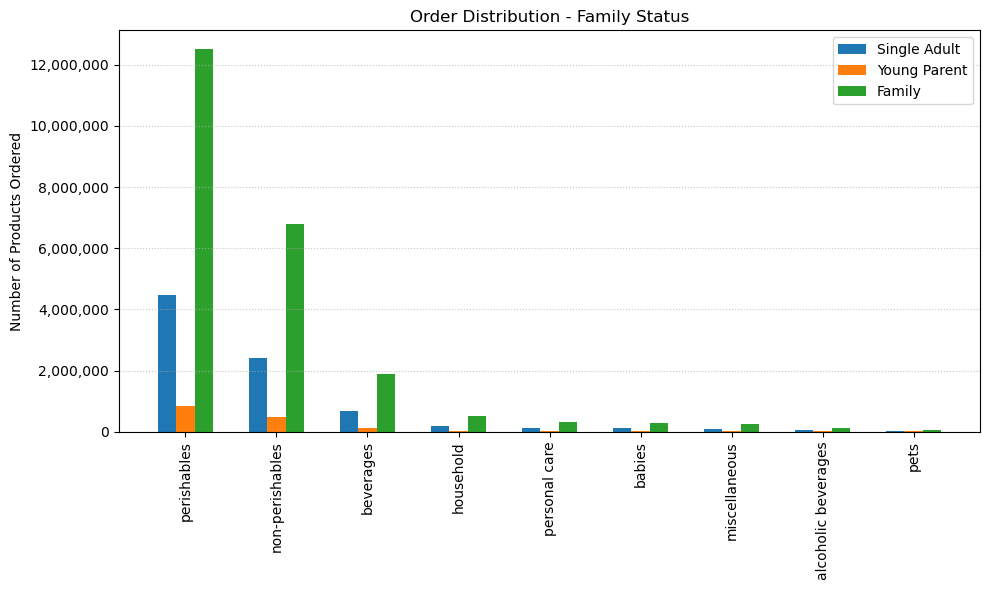

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/products/4.8.2_categories_family.png


In [42]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(orders_category_family.index))

# Plot each category as a separate bar (grouped format)
for i, category_family in enumerate(orders_category_family.columns):
    plt.bar(
        x + i * bar_width, 
        orders_category_family[category_family], 
        width=bar_width, 
        label=category_family
    )

# Set the title and labels
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(orders_category_family.columns) - 1) / 2), orders_category_family.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/products', '4.8.2_categories_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")